## Working with EASE-DGGS in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/07_ease.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/07_ease.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/07_ease.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/07_ease.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [1]:
# %pip install vgrid --upgrade

### latlon2ease

In [2]:
from vgrid.conversion.latlon2dggs import latlon2ease

lat = 10.775276
lon = 106.706797
res = 4
ease_id = latlon2ease(lat, lon, res)
ease_id

'L4.165767.02.02.22.45'

### EASE to Shapely Polygon

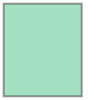

In [3]:
from vgrid.conversion.dggs2geo.ease2geo  import ease2geo

ease_geo = ease2geo(ease_id)
ease_geo

### EASE to GeoJSON        

In [4]:
from vgrid.conversion.dggs2geo.ease2geo import ease2geojson
ease_geojson = ease2geojson(ease_id)
ease_geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': (((106.70643153526966, 10.774742521949035),
      (106.70746887966799, 10.774742521949035),
      (106.70746887966799, 10.77597404904263),
      (106.70643153526966, 10.77597404904263),
      (106.70643153526966, 10.774742521949035)),)},
   'properties': {'ease': 'L4.165767.02.02.22.45',
    'resolution': 4,
    'center_lat': 10.7753583,
    'center_lon': 106.7069502,
    'avg_edge_len': 124.838,
    'cell_area': 15455.022,
    'cell_perimeter': 499.354}}]}

### Vector to EASE

Processing features: 100%|██████████| 4/4 [00:00<00:00, 18.56it/s]


<Axes: >

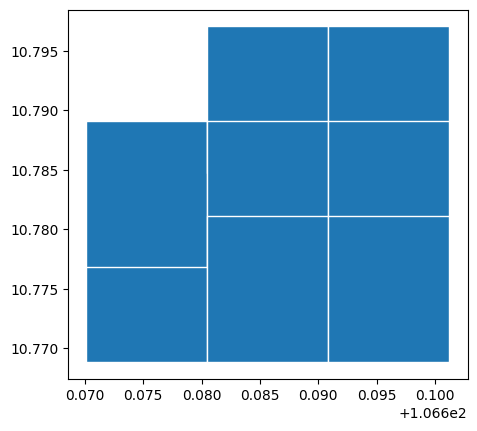

In [5]:
from vgrid.conversion.vector2dggs.vector2ease import vector2ease

file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/shape/polygon.geojson"
)
vector_to_ease  = vector2ease(file_path, resolution=3, compact=False, 
                                predicate = "intersects",output_format="gpd" )
# Visualize the output
vector_to_ease.plot(edgecolor="white")

### EASE Compact

<Axes: >

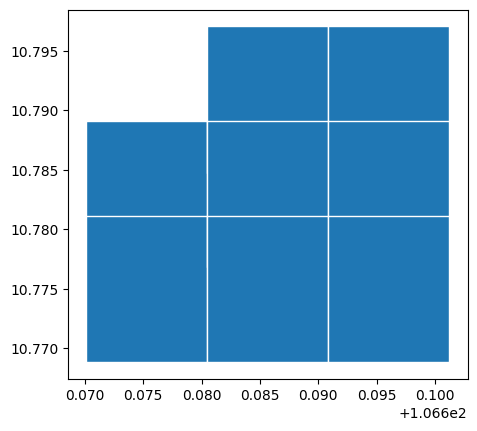

In [6]:
from vgrid.conversion.dggscompact.easecompact import easecompact

ease_compacted = easecompact(vector_to_ease, output_format="gpd")
ease_compacted.plot(edgecolor="white")

### EASE Expand

<Axes: >

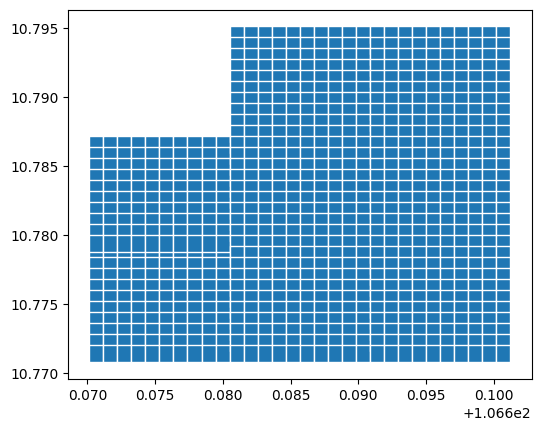

In [7]:
from vgrid.conversion.dggscompact import easeexpand

ease_expanded = easeexpand(vector_to_ease, resolution=4, output_format="gpd")
ease_expanded.plot(edgecolor="white")

### EASE Generator

Generating EASE DGGS: 100%|██████████| 4/4 [00:00<00:00, 274.51 cells/s]


<Axes: >

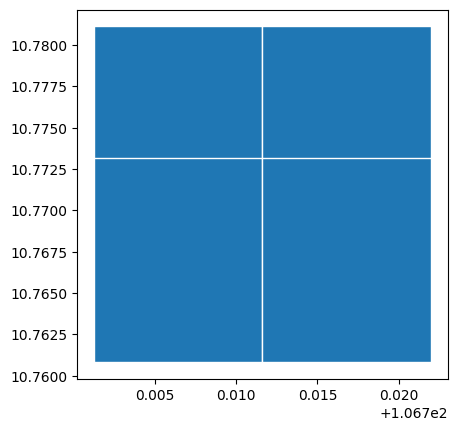

In [8]:
from vgrid.generator.easegrid import easegrid
ease_grid = easegrid(resolution=3,bbox=[106.699007, 10.762811, 106.717674, 10.778649],output_format="gpd")
ease_grid.plot(edgecolor="white")

### EASE Inspect

In [9]:
from vgrid.stats.easestats import easeinspect
resolution = 0
ease_inspect = easeinspect(resolution)
ease_inspect.head()

Generating EASE DGGS: 100%|██████████| 391384/391384 [09:07<00:00, 715.06 cells/s] 


ease  resolution  center_lat  center_lon  avg_edge_len     cell_area  \
0  L0.000000           0   83.631975 -179.813278      27069.75  2.290566e+08   
1  L0.000001           0   83.631975 -179.439834      27069.75  2.290566e+08   
2  L0.000002           0   83.631975 -179.066390      27069.75  2.290566e+08   
3  L0.000003           0   83.631975 -178.692946      27069.75  2.290566e+08   
4  L0.000004           0   83.631975 -178.319502      27069.75  2.290566e+08   

   cell_perimeter                                           geometry  crossed  \
0      108278.999  POLYGON ((-180 83.4103, -179.62656 83.4103, -1...    False   
1      108278.999  POLYGON ((-179.62656 83.4103, -179.25311 83.41...    False   
2      108278.999  POLYGON ((-179.25311 83.4103, -178.87967 83.41...    False   
3      108278.999  POLYGON ((-178.87967 83.4103, -178.50622 83.41...    False   
4      108278.999  POLYGON ((-178.50622 83.4103, -178.13278 83.41...    False   

   norm_area       ipq       zsc  
0   0.142283  0.245507  0.495487  
1   0.142283  0.245507  0.495487  
2   0.142283  0.245507  0.495487  
3   0.142283  0.245507  0.495487  
4   0.142283  0.245507  0.495487

### Distribution of EASE Area Distortions

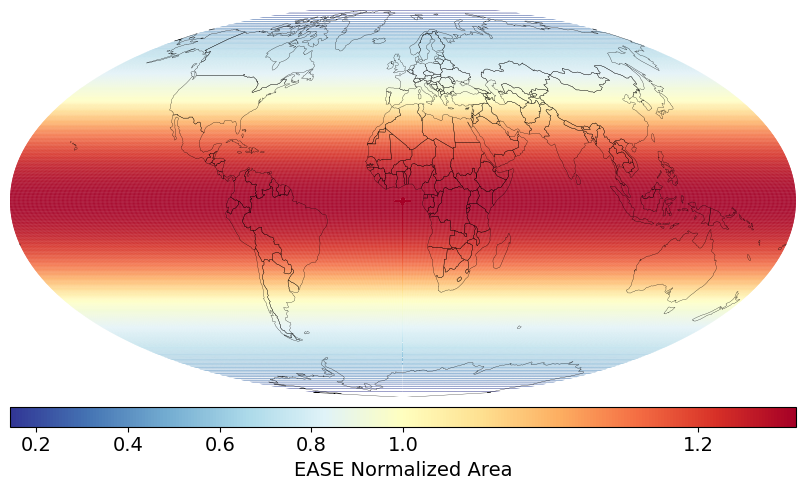

In [10]:
from vgrid.stats.easestats import ease_norm_area
ease_norm_area(ease_inspect)

### Distribution of EASE IPQ Compactness

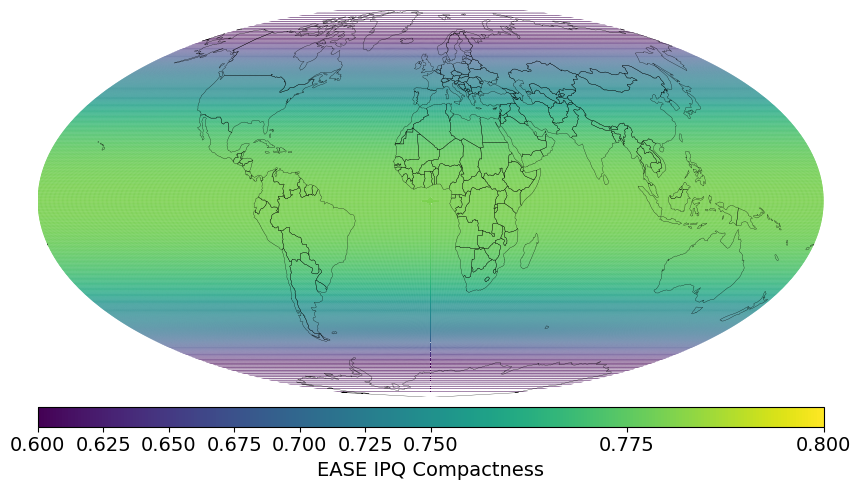

In [11]:
from vgrid.stats.easestats import ease_compactness
ease_compactness(ease_inspect)

### EASE Statistics

In [1]:
from vgrid.stats.easestats import easestats
easestats('km')

resolution  number_of_cells  avg_edge_len_km  avg_cell_area_km2
0           0           391384        36.032221        1298.320939
1           1          6262144         9.008055          81.145059
2           2         56359296         3.002685           9.016118
3           3        507233664         1.000895           1.001791
4           4      50723366400         0.100090           0.010018
5           5    5072336640000         0.010009           0.000100
6           6  507233664000000         0.001001           0.000001